In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker
from gwaxion import physics
import pandas as pd

# Fast method

## Fixed initial spin

In [2]:
# create an array of BH masses in LIGO's band
n_mass = 1000
n_alpha = 1000

mbhs_array = np.logspace(0, 3, n_mass).reshape(n_mass, 1)
distance = 5E6 * physics.PC_SI
chi_i = 0.7

In [3]:
alphas_array = np.linspace(0, 0.5, n_alpha).reshape(1, n_alpha)

h0s, fgws = physics.h0_scalar_brito(mbhs_array, alphas_array, chi_i=chi_i, d=distance)
mbhs = np.repeat(mbhs_array, n_alpha, axis=1)

fgws_ma = np.ma.masked_array(fgws, mask=fgws<=0)
h0s_ma = np.ma.masked_array(h0s, mask=(h0s<=1E-30)|(np.isnan(h0s)))

norm = matplotlib.colors.LogNorm(vmin=1E-30, vmax=h0s_ma.max())

# df1 = pd.DataFrame({'h0': h0s.flatten(), 'fgw': fgws.flatten(), 'mbhs': mbhs.flatten()})
# df1 = df1[df1['h0']>0]

In [4]:
# HEXBIN PLOT

# ax = plt.hexbin(mbhs.flatten(),fgws_ma.flatten(), C=h0s_ma.flatten(), xscale='log', yscale='log', cmap='Purples', norm=norm)
# cb = plt.colorbar(ax, norm=norm, label=r'$h_0$ (5 Mpc)')
# plt.ylabel(r'$f_{\rm GW}$ (Hz)')
# plt.xlabel(r'$M$ $(M_\odot)$')
# plt.ylim(5, 1e3)
# plt.show()
# plt.close()

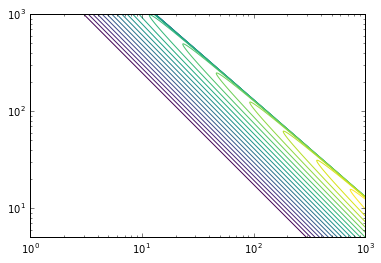

In [6]:
# CONTOUR PLOT (no fill)

# cs = plt.contour(mbhs,fgws_ma, np.log10(h0s_ma), 20, cmap='viridis')#, locator=ticker.LogLocator(100))
# plt.ylim(5, 1E3)
# plt.xscale('log')
# plt.yscale('log')
# plt.show()
# plt.close()

In [5]:
# get maximum amplitude per mass

df1 = pd.DataFrame({'h0': h0s.flatten(), 'fgw': fgws.flatten(), 'mbhs': mbhs.flatten()})
df1 = df1[(df1['h0']>0)&(df1['fgw']>0)]

grouped = df1.groupby('mbhs')
fgwmaxs = []
for mbh in mbhs_array.flatten():
    df_mbh = grouped.get_group(mbh)
    fgwmaxs.append(df_mbh['fgw'][df_mbh['h0']==df_mbh['h0'].max()].iloc[0])

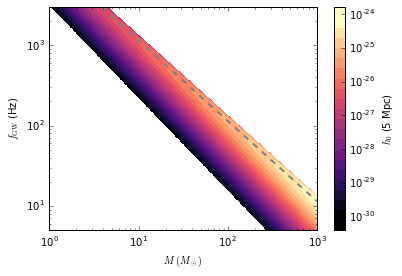

In [6]:
# FILLED CONTOUR PLOT

cm = plt.contourf(mbhs,fgws_ma, h0s_ma, locator=ticker.LogLocator(numticks=100,base=2), cmap='magma', norm=norm)
#cs = plt.contour(mbhs,fgws_ma, h0s_ma, ticklocation=ticker.LogLocator(), colors='lavender', norm=norm)
# fmt = ticker.LogFormatterMathtext()
# fmt.create_dummy_axis()
# plt.clabel(cs, cs.levels, inline=True, fontsize=8, fmt=fmt, loc='best')
cb_ticks = np.logspace(-30, -24, 7)# np.ceil(np.log10(h0s_ma[~np.isnan(h0s_ma)].max())), 7)
cb = plt.colorbar(cm, norm=norm, label=r'$h_0$ (5 Mpc)', ticks=cb_ticks)
plt.plot(mbhs_array.flatten(), fgwmaxs, '--', color='gray', lw=2)
plt.ylim(5, 3E3)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$f_{\rm GW}$ (Hz)')
plt.xlabel(r'$M$ $(M_\odot)$')
#ax = plt.gca()
#ax.patch.set_facecolor('k')
plt.show()
plt.close()

#TODO: make colorbar inset?

## Fixed initial mass

In [12]:
# create an array of BH masses in LIGO's band
n_spins = 1000
n_alpha = 500

mbh_i = 50
distance = 5E6 * physics.PC_SI
chis_array = np.linspace(0, 1, n_spins).reshape(n_spins, 1)

alphas_array = np.linspace(0, 0.5, n_alpha).reshape(1, n_alpha)

h0s, fgws = physics.h0_scalar_brito(mbh_i, alphas_array, chi_i=chis_array, d=distance)
chis = np.repeat(chis_array, n_alpha, axis=1)

fgws_ma = np.ma.masked_array(fgws, mask=fgws<=0)
h0s_ma = np.ma.masked_array(h0s, mask=(h0s<=1E-30) | (np.isnan(h0s)))

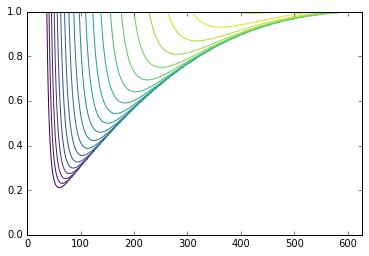

In [290]:
# cs = plt.contour(fgws_ma, chis, np.log10(h0s_ma), 20, cmap='viridis')#, locator=ticker.LogLocator(100))
#fmt = ticker.LogFormatterMathtext()
#fmt.create_dummy_axis()
#plt.clabel(cs, cs.levels, inline=True, fontsize=8, fmt=fmt, loc='best')
# plt.show()
# plt.close()

In [26]:
# get maximum amplitude per spin

df2 = pd.DataFrame({'h0': h0s.flatten(), 'fgw': fgws.flatten(), 'chi': chis.flatten()})
df2 = df2[(df2['h0']>0)&(df2['fgw']>0)]

grouped = df2.groupby('chi')
new_chis = grouped.groups.keys()
fgwmaxs = []
for chi in new_chis:
    df_chi = grouped.get_group(chi)
    fgwmaxs.append(df_chi['fgw'][df_chi['h0']==df_chi['h0'].max()].iloc[0])
chi_df = pd.DataFrame({'chi': new_chis, 'fgw': fgwmaxs})
chi_df.sort_values('chi', inplace=True)
chi_df = chi_df[chi_df['chi']>=0.2]

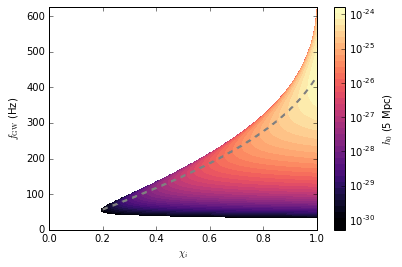

In [29]:
# FILLED CONTOUR PLOT

norm = matplotlib.colors.LogNorm(vmin=1E-30, vmax=h0s_ma.max())

cm = plt.contourf(chis, fgws_ma,h0s_ma, locator=ticker.LogLocator(numticks=500,base=1.5), cmap='magma', norm=norm)
#cs = plt.contour(mbhs,fgws_ma, h0s_ma, ticklocation=ticker.LogLocator(), colors='lavender', norm=norm)
# fmt = ticker.LogFormatterMathtext()
# fmt.create_dummy_axis()
# plt.clabel(cs, cs.levels, inline=True, fontsize=8, fmt=fmt, loc='best')
cb_ticks = np.logspace(-30, -24, 7)# np.ceil(np.log10(h0s_ma[~np.isnan(h0s_ma)].max())), 7)
cb = plt.colorbar(cm, norm=norm, label=r'$h_0$ (5 Mpc)', ticks=cb_ticks)
plt.plot(chi_df['chi'], chi_df['fgw'], '--', color='gray', lw=2)
#plt.ylim(5, 1E3)
#plt.xscale('log')
#plt.yscale('log')
plt.ylabel(r'$f_{\rm GW}$ (Hz)')
plt.xlabel(r'$\chi_i$')
plt.show()
plt.close()

# Slower alternative

In [42]:
mbhs_array = np.logspace(0, 3, n_mass)
h0s, fgws, alphas, mbhs = [], [], [], []
for mbh in mbhs_array:
    bh = physics.BlackHole(mass=mbh, chi=chi_i, msun=True)
    h0s_loc, fgws_loc, alphas_loc = bh.scan_alphas(alpha_max=0.5, delta_alpha=0.0001)
    mbhs = np.concatenate([mbhs, [mbh]*len(h0s_loc)])
    h0s = np.concatenate([h0s, h0s_loc])
    fgws = np.concatenate([fgws, fgws_loc])
    alphas = np.concatenate([alphas, alphas_loc])

df2 = pd.DataFrame({'h0': h0s/distance, 'fgw': fgws, 'alpha': alphas, 'mbhs': mbhs})
df2 = df1[df1['h0']>0]

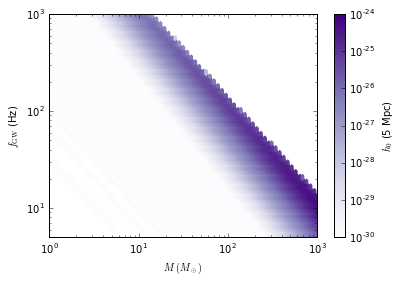

In [45]:
# plot
ax = plt.hexbin(df2['mbhs'], df2['fgw'], C=df2['h0'], xscale='log', yscale='log', cmap='Purples', norm=norm)
cb = plt.colorbar(ax, norm=norm, label=r'$h_0$ (5 Mpc)')
plt.ylabel(r'$f_{\rm GW}$ (Hz)')
plt.xlabel(r'$M$ $(M_\odot)$')
plt.ylim(5, 1e3)
plt.show()
plt.close()